# 원, 사각형, 삼각형 구분하기
- 어려운 테스트 문제를 데이터 부풀리기를 이용하여 데이터를 많이 생성
- 기존 CNN 모델 사용

In [ ]:
from google.colab import files
up = files.upload()

In [1]:
!unzip hard_handwriting_shape.zip -d hard_handwriting > /dev/null

In [1]:
from PIL import Image
from glob import glob
import matplotlib.pyplot as plt

- 데이터셋 생성하기

In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(
    rescale = 1/255.,
    rotation_range = 15,
    width_shift_range = 0.1,
    shear_range = 0.5,
    height_shift_range = 0.1,
    zoom_range = [0.8, 1.5],
    horizontal_flip = True,
    vertical_flip = True,
    fill_mode = "nearest"
)


In [3]:
from tensorflow.keras.preprocessing.image import img_to_array, load_img

img = load_img("/content/hard_handwriting/train/triangle/triangle001.png")
x = img_to_array(img)
x.shape

(24, 24, 3)

In [4]:
# x.reshape(1,24,24,3)
x = x.reshape((1,) + x.shape)
x.shape

(1, 24, 24, 3)

- 데이터 부풀리기를 통하여 만들어지는 새로운 도형 이미지

In [5]:
import os
if not os.path.exists("preview") :
    os.mkdir("preview")

In [6]:
train_datagen.flow(x, batch_size = 1, save_to_dir = "preview", save_prefix = "pre")

In [7]:
!ls -l preview

total 0


In [8]:
count = 0
for _ in train_datagen.flow(x, batch_size = 1, save_to_dir = "preview", save_prefix = "pre"):
    count += 1
    if count >= 30:
        break

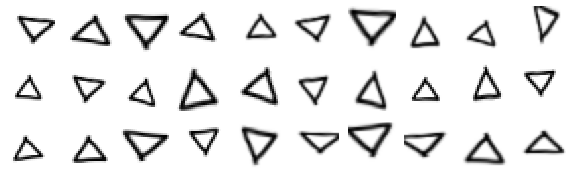

In [9]:
plt.figure(figsize = (10,3))
for i, fname in enumerate(glob("preview/*.png")):
    img = Image.open(fname)
    plt.subplot(3, 10, i+1)
    plt.imshow(img), plt.axis("off"), plt.xticks([]), plt.yticks([])
plt.show()

- data generator


In [10]:
train_datagenerator = train_datagen.flow_from_directory(
    "hard_handwriting/train", target_size = (24,24),
    batch_size = 3, class_mode = "categorical"
)

Found 45 images belonging to 3 classes.


In [11]:
test_datagen = ImageDataGenerator(rescale = 1/255.)
test_datagenerator = test_datagen.flow_from_directory(
    "hard_handwriting/test", target_size = (24,24),
    batch_size = 3, class_mode = "categorical"
)

Found 15 images belonging to 3 classes.


- 모델 정의/설정/학습/평가

In [12]:
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten

In [13]:
model = Sequential([
        Conv2D(32, (3,3), input_shape=(24,24,3), activation = "relu"),
        Conv2D(32, (3,3), activation = "relu"),
        MaxPooling2D(),
        Flatten(),
        Dense(128, activation = "relu"),
        Dense(3, activation = "softmax")
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 22, 22, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 20, 20, 32)        9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 10, 10, 32)       0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 3200)              0         
                                                                 
 dense (Dense)               (None, 128)               409728    
                                                                 
 dense_1 (Dense)             (None, 3)                 387       
                                                        

In [14]:
model.compile(optimizer = "adam", loss= "categorical_crossentropy", metrics = ["accuracy"])

In [15]:
model.fit(
    train_datagenerator, steps_per_epoch =15, epochs = 300,
    validation_data = test_datagenerator, validation_steps = 5
)

Epoch 1/300
15/15 [==============================] - 1s 30ms/step - loss: 1.2861 - accuracy: 0.3556 - val_loss: 1.1155 - val_accuracy: 0.3333
Epoch 2/300
15/15 [==============================] - 0s 21ms/step - loss: 1.0709 - accuracy: 0.3333 - val_loss: 1.1173 - val_accuracy: 0.2667
Epoch 3/300
15/15 [==============================] - 0s 18ms/step - loss: 0.9525 - accuracy: 0.6444 - val_loss: 1.3173 - val_accuracy: 0.2667
Epoch 4/300
15/15 [==============================] - 0s 17ms/step - loss: 0.7319 - accuracy: 0.6444 - val_loss: 1.7399 - val_accuracy: 0.2667
Epoch 5/300
15/15 [==============================] - 0s 17ms/step - loss: 0.8491 - accuracy: 0.5333 - val_loss: 1.5856 - val_accuracy: 0.2667
Epoch 6/300
15/15 [==============================] - 0s 17ms/step - loss: 0.5230 - accuracy: 0.8444 - val_loss: 2.2133 - val_accuracy: 0.2667
Epoch 7/300
15/15 [==============================] - 0s 17ms/step - loss: 0.5408 - accuracy: 0.8222 - val_loss: 1.6547 - val_accuracy: 0.4000
Epoch 

In [16]:
model.evaluate(test_datagenerator)

5/5 [==============================] - 0s 7ms/step - loss: 2.2557 - accuracy: 0.7333


[2.2556633949279785, 0.7333333492279053]